In [1]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools



# optional
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [3]:
# import dataset
data = pd.read_csv('Customer_Behaviour.csv')
print(f"shape: {data.shape}")
data.head()

shape: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = pd.DataFrame(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


According to the above information:
 - It seems that there are no missing values, which will be checked in more detail below.
 - We have 4 features including `User ID`, `Gender`, `Age` and `EstimatedSalary`.
 - Our target is `Purchased`
 - We have only one categorical data that is `Gender`

In [6]:
# Check missing value
df.isnull().sum().to_frame('NaN value').T

,User ID,Gender,Age,EstimatedSalary,Purchased
NaN value,0,0,0,0,0


In [7]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

User ID: 400
Gender: 2
Age: 43
EstimatedSalary: 117
Purchased: 2


In [8]:
# more details
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [9]:
df.describe(include=[object]).T

,count,unique,top,freq
Gender,400,2,Female,204


According to above tables:
 - The age range is between 16 and 60 years.
 - Target includes 2 classes 1 and 0.
 - The number of male and female in the dataset is almost the same.
 - The range of features are very different from each other and there is a need for standardization.

We do not need the user ID column to build the predictive model, so we drop it

In [10]:
# Drop User ID columns
df.drop('User ID', axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [11]:
# convert categoriacl feature to numerical:
# only Gender is categorical
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


Now check dataset for the last time

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [13]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

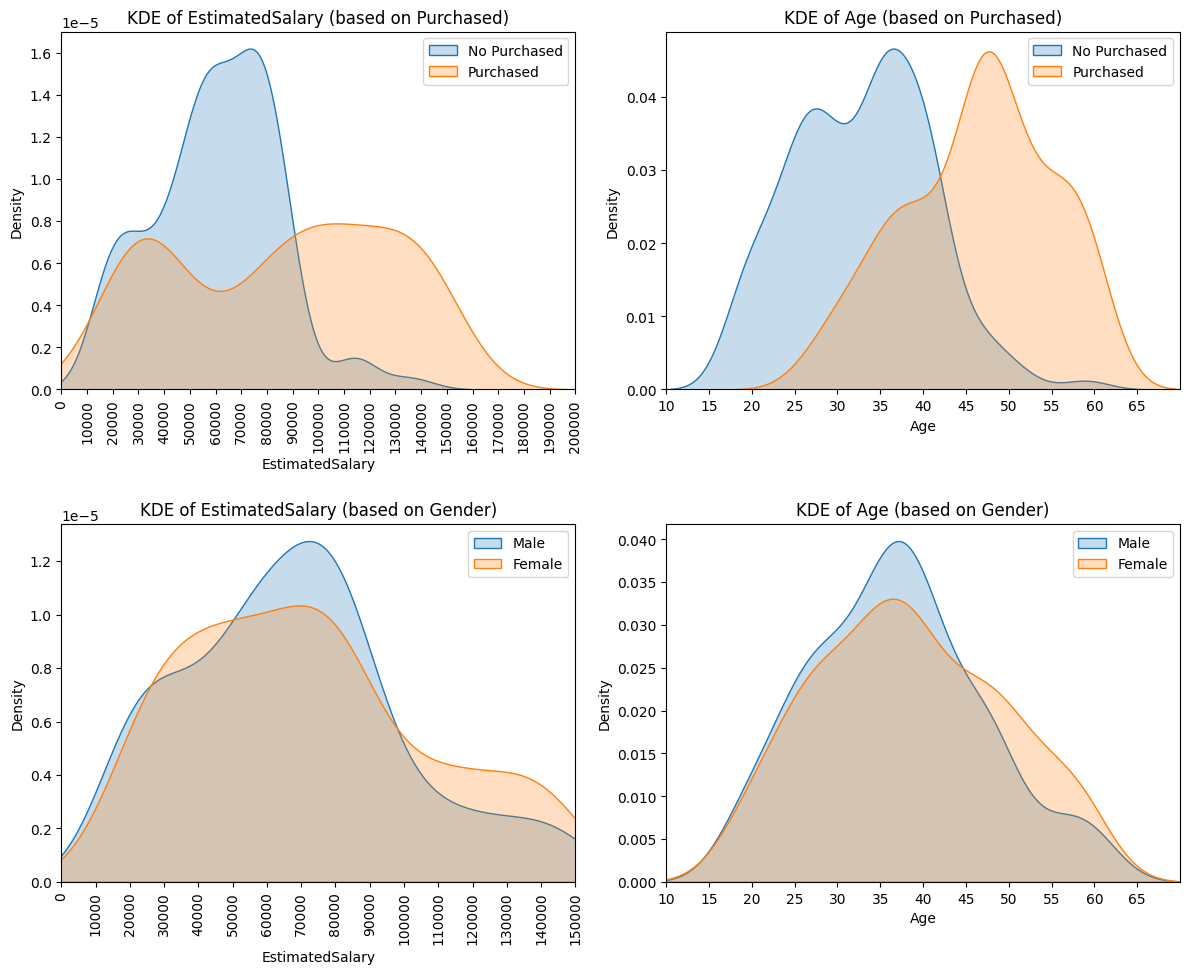

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Set font properties for titles
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KDE of EstimatedSalary based on Purchased
sns.kdeplot(df.loc[df['Purchased'] == 0, 'EstimatedSalary'], label='No Purchased', shade=True, ax=axes[0, 0])
sns.kdeplot(df.loc[df['Purchased'] == 1, 'EstimatedSalary'], label='Purchased', shade=True, ax=axes[0, 0])
axes[0, 0].set_title('KDE of EstimatedSalary (based on Purchased)')
axes[0, 0].set_xticks(np.arange(0, 200001, 10000))
axes[0, 0].set_xlim([0, 200001])
axes[0, 0].legend()
axes[0, 0].set_xticklabels(np.arange(0, 200001, 10000), rotation=90)




# KDE of Age based on Purchased
sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label='No Purchased', shade=True, ax=axes[0, 1])
sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label='Purchased', shade=True, ax=axes[0, 1])
axes[0, 1].set_title('KDE of Age (based on Purchased)')
axes[0, 1].set_xticks(np.arange(0, 70, 5))
axes[0, 1].set_xlim([10, 70])
axes[0, 1].legend()

# KDE of EstimatedSalary based on Gender
sns.kdeplot(df.loc[df['Gender'] == 0, 'EstimatedSalary'], label='Male', shade=True, ax=axes[1, 0])
sns.kdeplot(df.loc[df['Gender'] == 1, 'EstimatedSalary'], label='Female', shade=True, ax=axes[1, 0])
axes[1, 0].set_title('KDE of EstimatedSalary (based on Gender)')
axes[1, 0].set_xticks(np.arange(0, 150001, 10000))
axes[1, 0].set_xlim([0, 150001])
axes[1, 0].legend()
axes[1, 0].set_xticklabels(np.arange(0, 150001, 10000), rotation=90)
# KDE of Age based on Gender
sns.kdeplot(df.loc[df['Gender'] == 0, 'Age'], label='Male', shade=True, ax=axes[1, 1])
sns.kdeplot(df.loc[df['Gender'] == 1, 'Age'], label='Female', shade=True, ax=axes[1, 1])
axes[1, 1].set_title('KDE of Age (based on Gender)')
axes[1, 1].set_xticks(np.arange(0, 70, 5))
axes[1, 1].set_xlim([10, 70])
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.5100,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


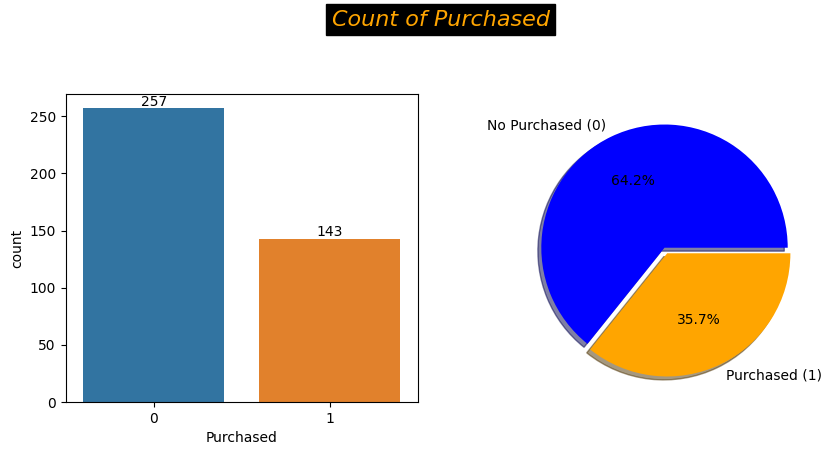

In [25]:
# count based on Purchased (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Purchased', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Purchased (pie chart)
slices = df.Purchased.value_counts().values
activities = ['No Purchased (0)', 'Purchased (1)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Purchased', y=1.09, **font)
plt.show()

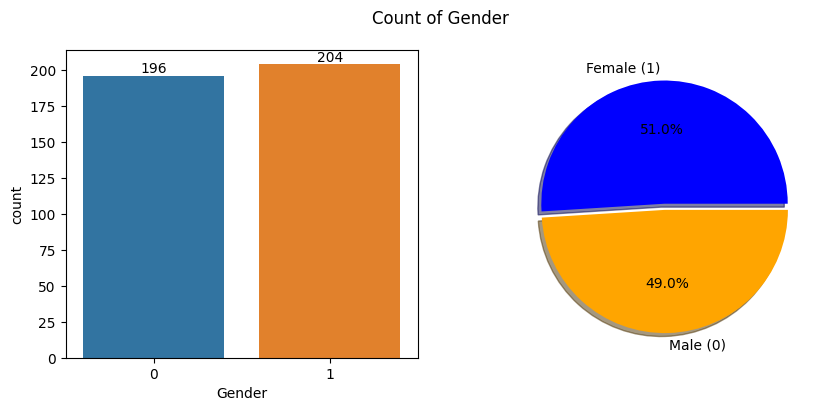

In [27]:
# count based on Gender (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Gender', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Gender (pie chart)
slices = df.Gender.value_counts().values
activities = ['Female (1)', 'Male (0)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Gender')
plt.show()

According to above barplots and tabel:
 - The number of male and female is almost the same
 - he number of people who decide to purchased a product is less than the number of people who do not decide to purchased a product.

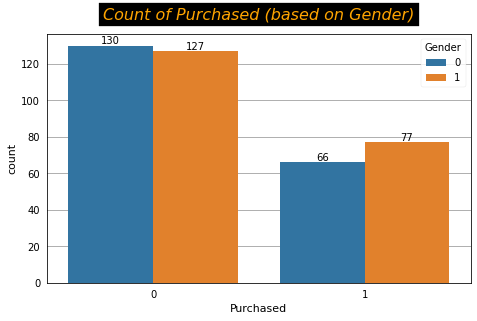

In [21]:
# count of purchased based on Gender
%matplotlib inline
ax = sns.countplot(data=df, x='Purchased', hue='Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Purchased (based on Gender)', fontdict=font, pad=15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


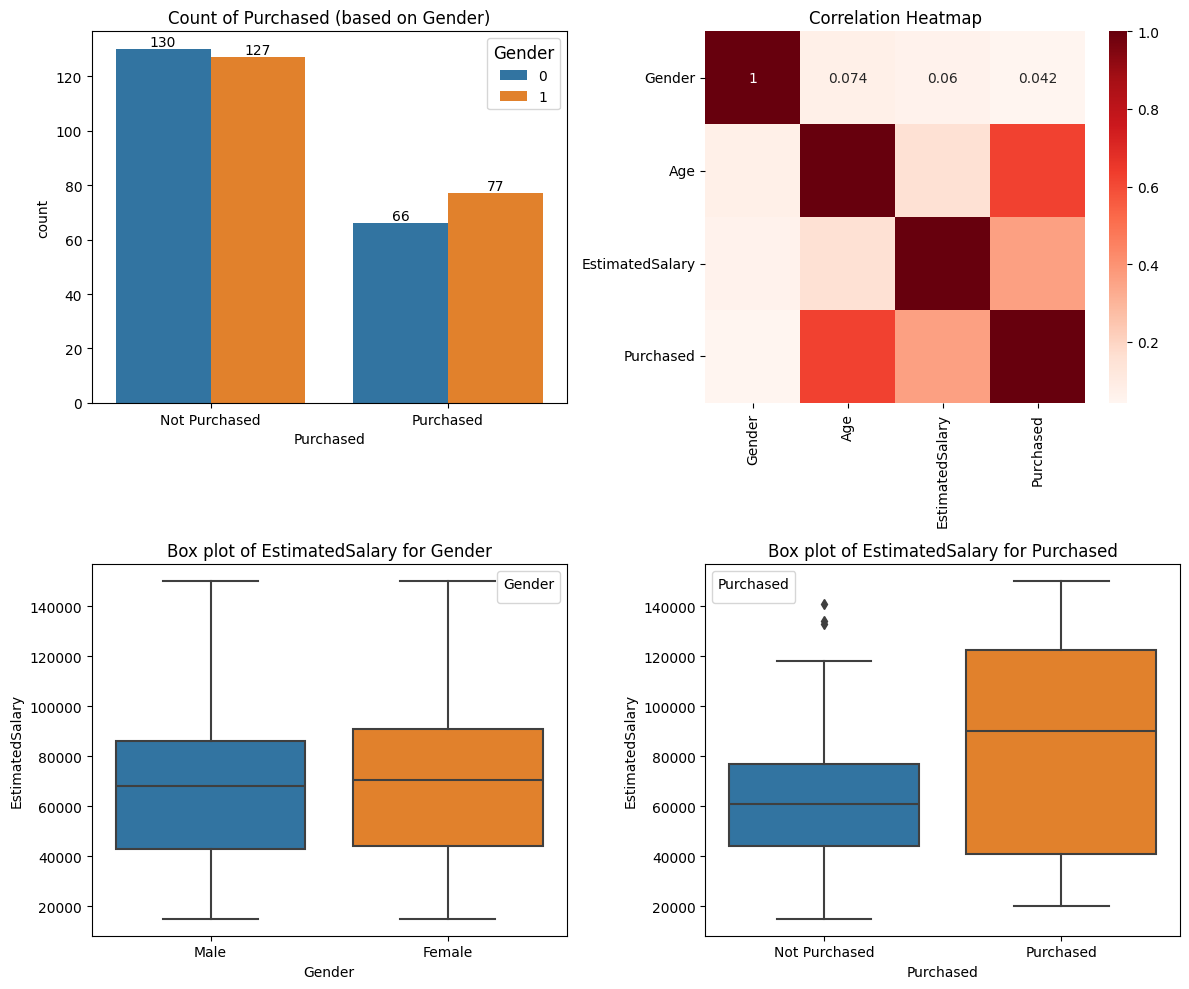

In [31]:
# Visualizing Count of Purchased based on Gender
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Mapping numeric labels to categorical labels
gender_labels = {0: 'Male', 1: 'Female'}
purchased_labels = {0: 'Not Purchased', 1: 'Purchased'}

# Count of Purchased based on Gender
ax1 = sns.countplot(data=df, x='Purchased', hue='Gender', ax=axes[0, 0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0, 0].set_title('Count of Purchased (based on Gender)')
axes[0, 0].legend(title='Gender').set_title('Gender', prop={'size': 12})
axes[0, 0].set_xticklabels(purchased_labels.values())

# Heatmap
sns.heatmap(df.corr(), cmap='Reds', annot=True, ax=axes[0, 1])
axes[0, 1].set_title('Correlation Heatmap')

# Box plot of Estimated Salary by Gender and Purchasing Behavior
for i, col in enumerate(['Gender', 'Purchased']):
    sns.boxplot(data=df, x=col, y='EstimatedSalary', ax=axes[1, i])
    axes[1, i].set_title(f'Box plot of EstimatedSalary for {col}')
    if col == 'Gender':
        axes[1, i].set_xticklabels([gender_labels[label] for label in df[col].unique()])
    else:
        axes[1, i].set_xticklabels([purchased_labels[label] for label in df[col].unique()])
    axes[1, i].legend(title=col)

# Adjust layout
plt.tight_layout()
plt.show()


We use scatter plots to examine data that is numerical in nature.

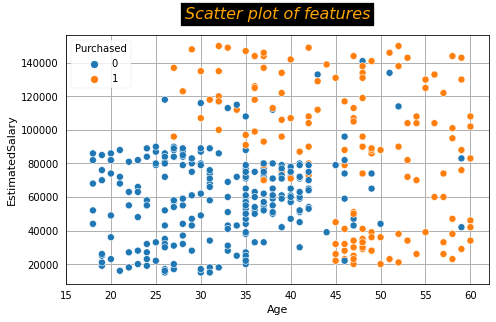

In [24]:
%matplotlib inline
# check feature correlation
sns.scatterplot(data=df,x='Age', y='EstimatedSalary', hue='Purchased',)
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(15,65,5))
plt.show()

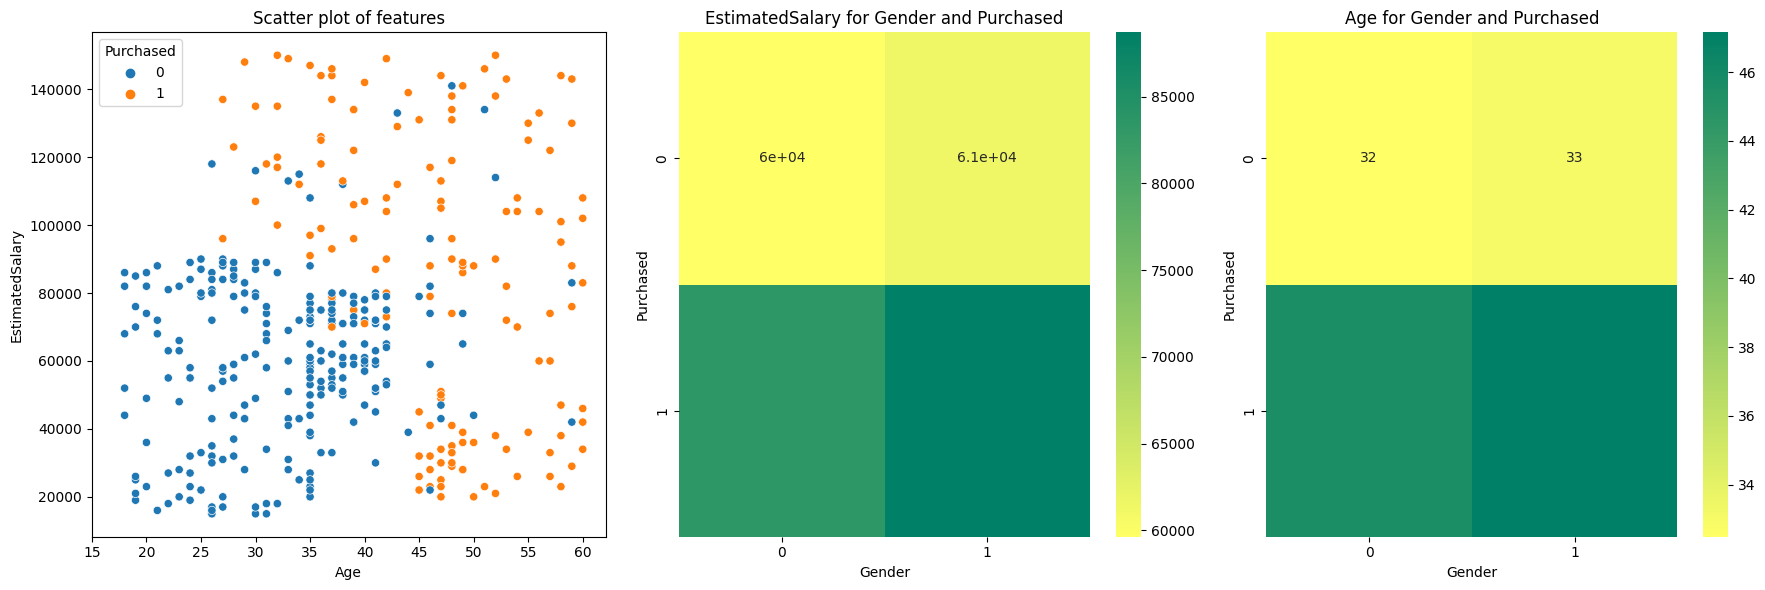

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font properties for titles
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create one row with three subplots

# Scatter plot of Age vs EstimatedSalary colored by Purchased
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', ax=axes[0])
axes[0].set_title('Scatter plot of features')
axes[0].set_xticks(np.arange(15, 65, 5))

# Heatmap of mean EstimatedSalary by Gender and Purchased
results_salary = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='EstimatedSalary')
sns.heatmap(results_salary, cmap='summer_r', annot=True, ax=axes[1])
axes[1].set_title('EstimatedSalary for Gender and Purchased')

# Heatmap of mean Age by Gender and Purchased
results_age = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='Age')
sns.heatmap(results_age, cmap='summer_r', annot=True, ax=axes[2])
axes[2].set_title('Age for Gender and Purchased')

# Adjust layout
plt.tight_layout()
plt.show()


For a better view, we draw a 3D scatter plot

In [25]:
fig = px.scatter_3d(
        data_frame=df,
        x='Age',
        y='EstimatedSalary',
        z='Gender',
        color='Purchased',
        template='ggplot2',
        opacity=0.6,
        height=700,
        title=f'3d scatter based on Age, EstimatedSalary, Gender and Purchased'
)

pio.show(fig)

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head5">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              5. Model
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head5">¶</a></p>
</h1>
</div>

In [42]:
# Our dataset we use for modeling
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


As you can see, both discrete and continuous types of data can be seen in the dataset, so among the types of Naive Bayes, we use the Multinomial Naive Bayes.
Considering that the range of features are very different, as mentioned before, they should be standardized first.

In [43]:
# standardize EstimatedSalary and Age with StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,60)).fit(df[['EstimatedSalary']])
df2['EstimatedSalary'] = scaler.transform(df2['EstimatedSalary'].values.reshape(-1,1))
df2

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19.244444,0
1,0,35,19.555556,0
2,1,26,26.711111,0
3,1,27,31.066667,0
4,0,19,36.977778,0
...,...,...,...,...
395,1,46,26.088889,1
396,0,51,20.488889,1
397,1,50,19.555556,1
398,0,36,23.600000,0


In [45]:
# define x (features) and y (target)
x = np.asanyarray(df2.drop('Purchased', axis=1))
y = df2.Purchased.values.reshape(-1,1)

In [46]:
FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models 
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results')
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}), 
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model evaluation
    ax[1].set_title('Model Accuracy Results for train and test')
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}), 
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()

    # plot ROC curve for class 1
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    i=1
    ax[0].set_title('ROC Curve of Class 1')
    for fpr , tpr in zip(FPR1, TPR1):
        ax[0].plot(fpr, tpr, label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[0].set_xlabel('FPR')
        ax[0].set_ylabel('TPR')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
        
    # plot ROC curve for class zero
    i=1
    ax[1].set_title('ROC Curve of Class 0')
    for fpr , tpr in zip(FPR0, TPR0):
        ax[1].plot(fpr, tpr, '--', label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True)
    
    plt.show()

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1 ):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")
    


    # define model and fit model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_test[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_proba_test[:,0])
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return clf, acc_test, acc_train

-------------------- Shape --------------------
x_train: (320, 3)
y_train: (320, 1)
x_test: (80, 3)
y_test: (80, 1)


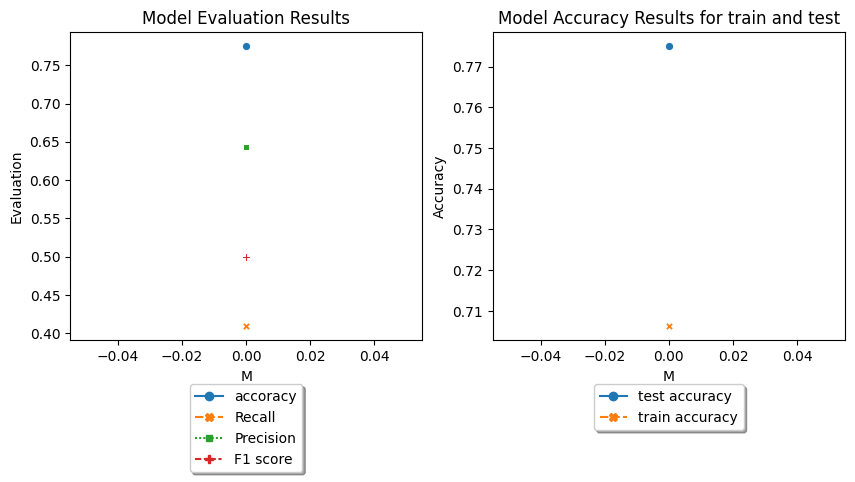

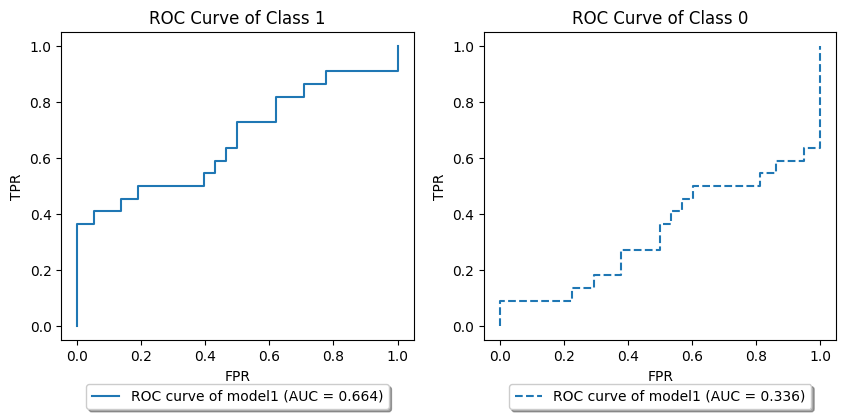

-------------------- Confusion Matrix --------------------
[[53  5]
 [13  9]]


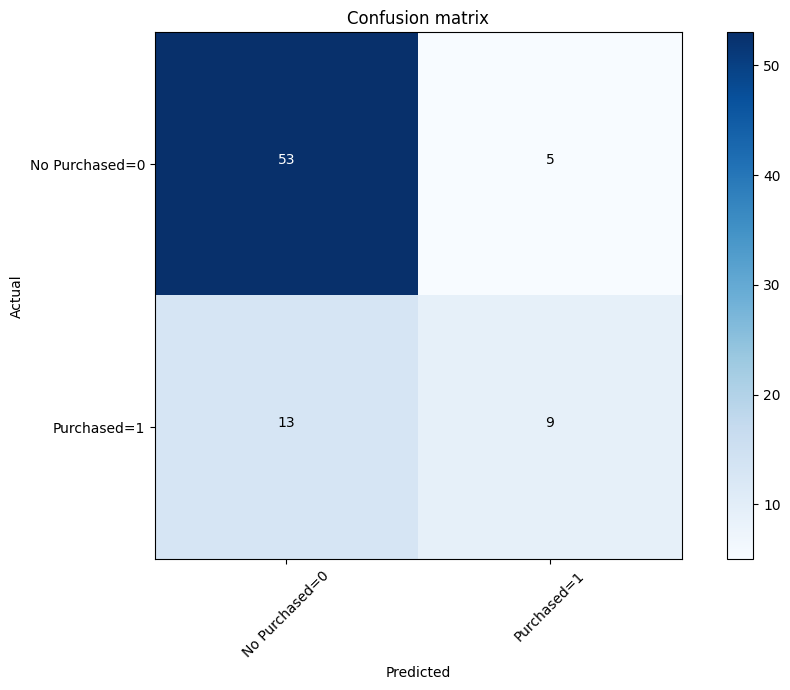

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.80      0.91      0.85        58
   Purchased=1       0.64      0.41      0.50        22

      accuracy                           0.78        80
     macro avg       0.72      0.66      0.68        80
  weighted avg       0.76      0.78      0.76        80
 

Jaccard Score: 0.3333333333333333 



In [47]:
# Now create first model
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Purchased=0', 'Purchased=1'])

Descriptive Statistics Visualization:
Continuous Variables (Age, EstimatedSalary):

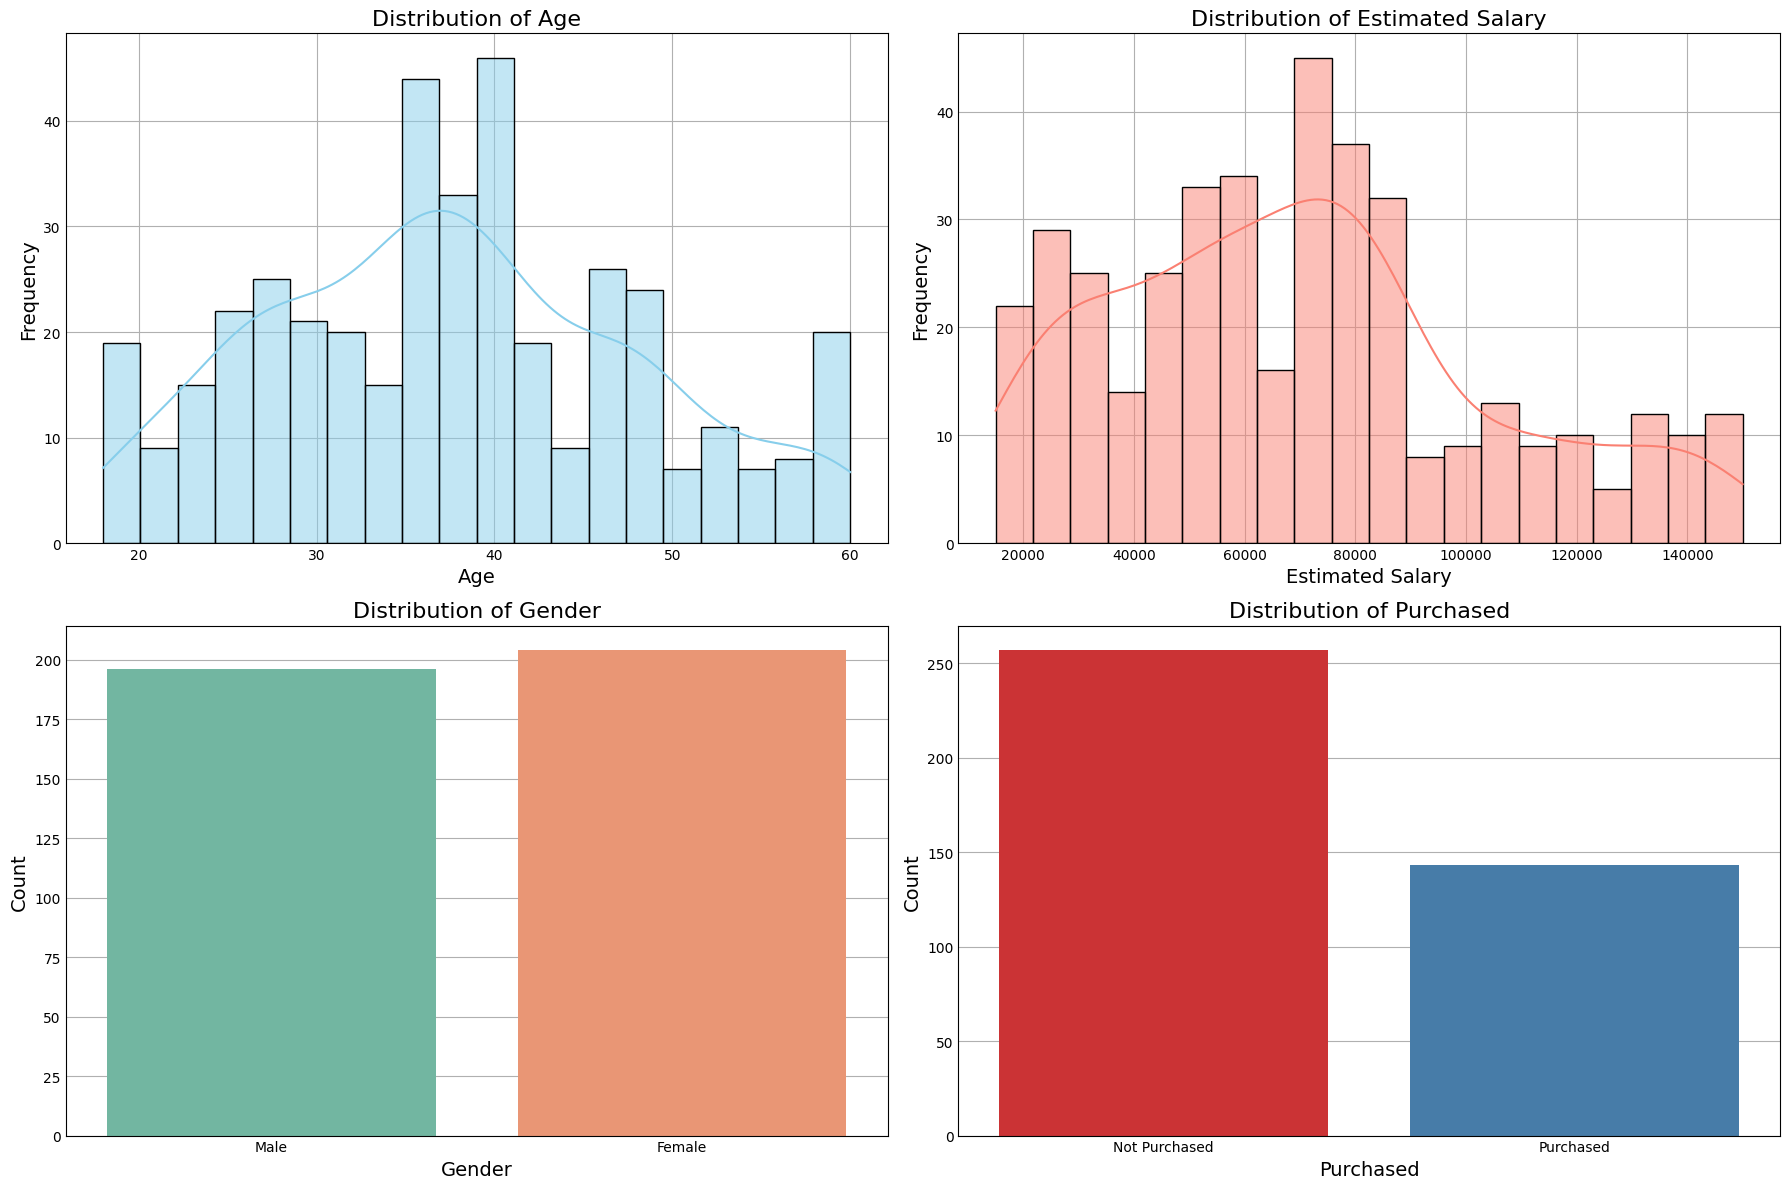

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Visualize Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)

# Visualize EstimatedSalary distribution
sns.histplot(df['EstimatedSalary'], bins=20, kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Estimated Salary', fontsize=16)
axes[0, 1].set_xlabel('Estimated Salary', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)

# Visualize Gender distribution
sns.countplot(data=df, x='Gender', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Gender', fontsize=16)
axes[1, 0].set_xlabel('Gender', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Male', 'Female'])

# Visualize Purchased distribution
sns.countplot(data=df, x='Purchased', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Purchased', fontsize=16)
axes[1, 1].set_xlabel('Purchased', fontsize=14)
axes[1, 1].set_ylabel('Count', fontsize=14)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Not Purchased', 'Purchased'])

# Adjust layout
plt.tight_layout()
plt.show()


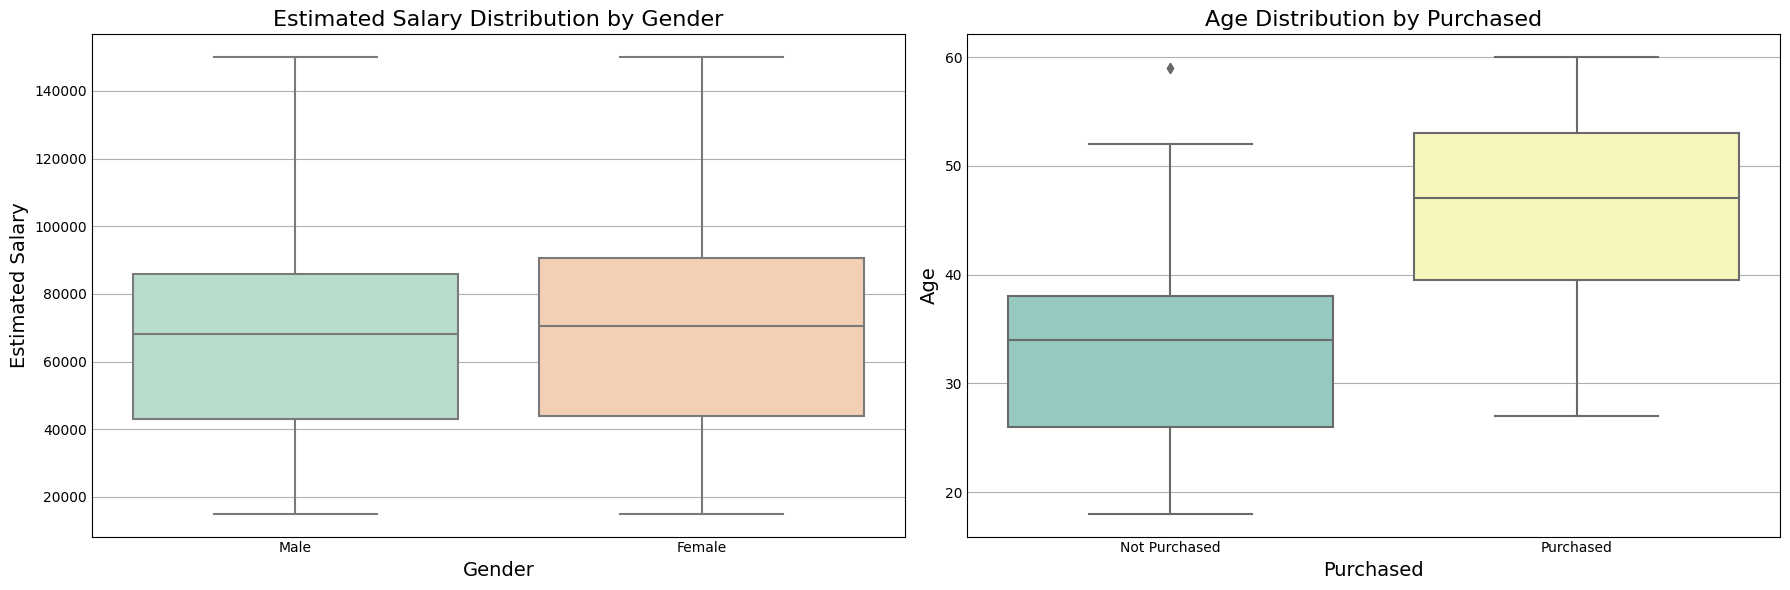

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Visualize EstimatedSalary distribution by Gender
sns.boxplot(data=df, x='Gender', y='EstimatedSalary', palette='Pastel2', ax=axes[0])
axes[0].set_title('Estimated Salary Distribution by Gender', fontsize=16)
axes[0].set_xlabel('Gender', fontsize=14)
axes[0].set_ylabel('Estimated Salary', fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'])

# Visualize relationship between Age and Purchased
sns.boxplot(data=df, x='Purchased', y='Age', palette='Set3', ax=axes[1])
axes[1].set_title('Age Distribution by Purchased', fontsize=16)
axes[1].set_xlabel('Purchased', fontsize=14)
axes[1].set_ylabel('Age', fontsize=14)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Purchased', 'Purchased'])

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Calculate descriptive statistics for Age and EstimatedSalary
age_stats = df['Age'].describe()
salary_stats = df['EstimatedSalary'].describe()

# Display descriptive statistics
print("Descriptive Statistics for Age:")
print(age_stats)
print("\nDescriptive Statistics for EstimatedSalary:")
print(salary_stats)


Descriptive Statistics for Age:
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

Descriptive Statistics for EstimatedSalary:
count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64


In [17]:
# Calculate frequency distribution for Gender and Purchased
gender_counts = df['Gender'].value_counts()
purchase_counts = df['Purchased'].value_counts()

# Calculate proportions
gender_proportions = gender_counts / len(df)
purchase_proportions = purchase_counts / len(df)

# Display frequency distribution and proportions
print("Frequency Distribution for Gender:")
print(gender_counts)
print("\nProportions for Gender:")
print(gender_proportions)
print("\nFrequency Distribution for Purchased:")
print(purchase_counts)
print("\nProportions for Purchased:")
print(purchase_proportions)


Frequency Distribution for Gender:
Gender
Female    204
Male      196
Name: count, dtype: int64

Proportions for Gender:
Gender
Female    0.51
Male      0.49
Name: count, dtype: float64

Frequency Distribution for Purchased:
Purchased
0    257
1    143
Name: count, dtype: int64

Proportions for Purchased:
Purchased
0    0.6425
1    0.3575
Name: count, dtype: float64


In [19]:
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient
rho, p_value = spearmanr(df['Age'], df['Purchased'])

# Display results
print("Spearman Correlation Results between Age and Purchased:")
print("Correlation Coefficient (rho):", rho)
print("P-value:", p_value)


Spearman Correlation Results between Age and Purchased:
Correlation Coefficient (rho): 0.6123232966381384
P-value: 1.5900034008998687e-42
